<br>
<img src="data/instagram_logo.png" alt="Logo de Instagram" style="width:450px"/>

# **Instagram NLP Posts Classifier**<br>

### 👨‍💻 Jorge Gómez Galván
* LinkedIn: [linkedin.com/in/jorgeggalvan/](https://www.linkedin.com/in/jorgeggalvan/) 
* E-mail: ggalvanjorge@gmail.com
---

## **Procesamiento del lenguaje natural (NLP)**

In [1]:
# Importación de librerías
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

# Librerías para procesar texto
import nltk
from nltk.stem import WordNetLemmatizer

# Descarga de los recursos más populares de la librería NLTK
nltk.download('popular', quiet=True)

True

In [2]:
# Lectura del dataset
df_posts = pd.read_csv('./data/instagram_posts.csv', sep=';', lineterminator='\n')
df_posts = df_posts.drop('Unnamed: 0', axis='columns') # Eliminación de columnas irrelevantes
df_posts = df_posts[['category','text']] # Reordenamiento de columnas

df_posts.head(5)

,category,text
0,fashion,forcing the bridesmaids to join your #ootd #mi...
1,pet,Catman: How do I get anything done?Me: Welcome...
2,fashion,"guys please check out @awa_khiwe, a really tal..."
3,travel,With a world that feels like it's falling apar...
4,fashion,Last night 🤫🤫🤫 ..#pink #club #nightout #dress ...


In [3]:
# Tamaño del dataset
df_posts.shape

(618437, 2)

In [4]:
# Porcentaje de publicaciones por categoría
category_post = df_posts['category'].value_counts(normalize=True).round(4)
category_post = category_post.to_frame(name='percentage').reset_index().rename(columns={'index':'category'})

category_post

,category,percentage
0,fashion,0.3308
1,other,0.1614
2,family,0.1298
3,food,0.1231
4,travel,0.1183
5,beauty,0.0407
6,interior,0.0403
7,fitness,0.0360
8,pet,0.0196
9,fasion,0.0000


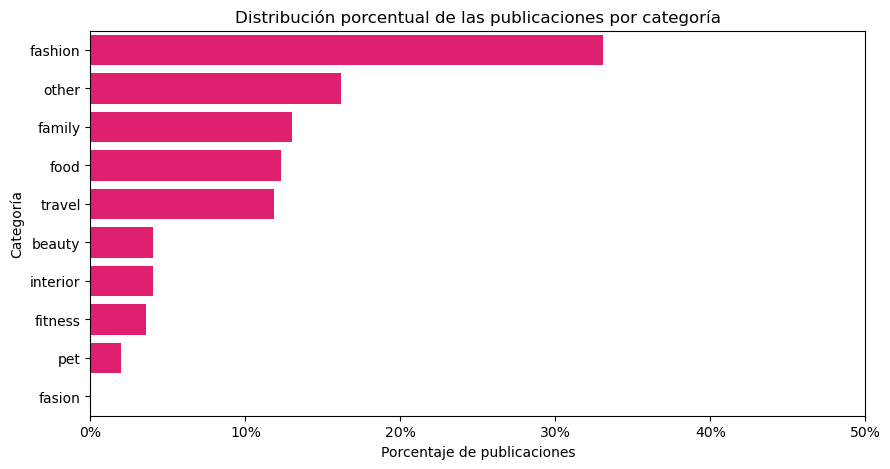

In [5]:
plt.figure(figsize=(10, 5)) # Ajuste del tamaño del gráfico

# Gráficos de barras con el porcentaje de publicaciones por categoría
sns.barplot(x='percentage', y='category', data=category_post, color='#FF0069')

# Título y etiquetas de los ejes
plt.title('Distribución porcentual de las publicaciones por categoría')
plt.xlabel('Porcentaje de publicaciones')
plt.ylabel('Categoría')
plt.xlim(0, 0.5) # Ajuste del límite del eje x

# Configuración para agregar el signo de porcentaje al eje x
plt.gca().xaxis.set_major_formatter(mticker.PercentFormatter(xmax=1, decimals=0))

plt.show()

### 1 - Normalización de categorías

In [6]:
# Normalización de la categoría 'fasion'
df_posts['category'] = df_posts['category'].str.replace('fasion', 'fashion')

### 2 - Lowercasing

In [7]:
# Conversión de las mayúsculas del texto de las publicaciones a minúsculas
df_posts['text'] = df_posts['text'].str.lower().replace(',')

### 3 - Tokenización

In [8]:
# Lista vacía para almacenar los textos tokenizados
list_text_tokenized = []

# Bucle para tokenizar los textos
for text in df_posts['text']:
    
    # División del texto en palabras
    text_tokenized = nltk.word_tokenize(text = text)
    
    # Agregar los textos tokenizados a la lista
    list_text_tokenized.append(text_tokenized)

# Agregar los textos tokenizados al dataframe
df_posts['text_tokenized'] = list_text_tokenized
df_posts.head(5)

,category,text,text_tokenized
0,fashion,forcing the bridesmaids to join your #ootd #mi...,"[forcing, the, bridesmaids, to, join, your, #,..."
1,pet,catman: how do i get anything done?me: welcome...,"[catman, :, how, do, i, get, anything, done, ?..."
2,fashion,"guys please check out @awa_khiwe, a really tal...","[guys, please, check, out, @, awa_khiwe, ,, a,..."
3,travel,with a world that feels like it's falling apar...,"[with, a, world, that, feels, like, it, 's, fa..."
4,fashion,last night 🤫🤫🤫 ..#pink #club #nightout #dress ...,"[last, night, 🤫🤫🤫, .., #, pink, #, club, #, ni..."


### 4 - Eliminación de stop words

In [9]:
# Importación de las stop words
stop_words = nltk.corpus.stopwords.words('english')

print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [10]:
# Lista vacía para almacenar los textos sin stop words
list_text_filtered = []

# Bucle para eliminar las stops words
for text in df_posts['text_tokenized']:
    
    # Eliminación de las stop words
    text_filtered = list(filter(lambda word: word not in stop_words, text))
    
    # Agregar los textos sin stop words a la lista
    list_text_filtered.append(text_filtered)

# Agregar los textos sin stop words al dataframe
df_posts['text_filtered'] = list_text_filtered
df_posts.head(5)

,category,text,text_tokenized,text_filtered
0,fashion,forcing the bridesmaids to join your #ootd #mi...,"[forcing, the, bridesmaids, to, join, your, #,...","[forcing, bridesmaids, join, #, ootd, #, mirro..."
1,pet,catman: how do i get anything done?me: welcome...,"[catman, :, how, do, i, get, anything, done, ?...","[catman, :, get, anything, done, ?, :, welcome..."
2,fashion,"guys please check out @awa_khiwe, a really tal...","[guys, please, check, out, @, awa_khiwe, ,, a,...","[guys, please, check, @, awa_khiwe, ,, really,..."
3,travel,with a world that feels like it's falling apar...,"[with, a, world, that, feels, like, it, 's, fa...","[world, feels, like, 's, falling, apart, ,, 's..."
4,fashion,last night 🤫🤫🤫 ..#pink #club #nightout #dress ...,"[last, night, 🤫🤫🤫, .., #, pink, #, club, #, ni...","[last, night, 🤫🤫🤫, .., #, pink, #, club, #, ni..."


<div style="border: 5px solid #FF0069; padding: 20px; font-size: 16px; background-color: rgba(255, 0, 105, 0.2);">
Las stop words son palabras comunes y poco informativas en un idioma. Estas palabras tienen un uso frecuente, pero aportan poco valor semántico o contextual en el análisis de texto. 
<br><br>
Eliminar las stop words de cara a realizar un modelo de clasificación de publicaciones puede ser relevante, ya que reduce la dimensión del conjunto de palabras, mejora la calidad del texto al destacar palabras clave relevantes y permite al modelo centrarse en información significativa para una clasificación precisa.
</div>

### 5 - Lematización de palabras

In [11]:
# Lista vacía para almacenar los textos lematizados
list_text_lemmatized = []

# Inicialización de un lematizador para el inglés
wnl = WordNetLemmatizer()

# Bucle para lematizar las palabras
for text in df_posts['text_filtered']:
    
    # Lematización de las palabras y unificación de las mismas para volver a formar una frase
    text_lemmatized = " ".join([wnl.lemmatize(word) for word in text])
    
    # Agregar los textos lematizados a la lista
    list_text_lemmatized.append(text_lemmatized)

# Agregar los textos lematizados al dataframe
df_posts['text_lemmatized'] = list_text_lemmatized
df_posts.head(5)

,category,text,text_tokenized,text_filtered,text_lemmatized
0,fashion,forcing the bridesmaids to join your #ootd #mi...,"[forcing, the, bridesmaids, to, join, your, #,...","[forcing, bridesmaids, join, #, ootd, #, mirro...",forcing bridesmaid join # ootd # mirrormoment ...
1,pet,catman: how do i get anything done?me: welcome...,"[catman, :, how, do, i, get, anything, done, ?...","[catman, :, get, anything, done, ?, :, welcome...",catman : get anything done ? : welcome world 😀...
2,fashion,"guys please check out @awa_khiwe, a really tal...","[guys, please, check, out, @, awa_khiwe, ,, a,...","[guys, please, check, @, awa_khiwe, ,, really,...","guy please check @ awa_khiwe , really talented..."
3,travel,with a world that feels like it's falling apar...,"[with, a, world, that, feels, like, it, 's, fa...","[world, feels, like, 's, falling, apart, ,, 's...","world feel like 's falling apart , 's importan..."
4,fashion,last night 🤫🤫🤫 ..#pink #club #nightout #dress ...,"[last, night, 🤫🤫🤫, .., #, pink, #, club, #, ni...","[last, night, 🤫🤫🤫, .., #, pink, #, club, #, ni...",last night 🤫🤫🤫 .. # pink # club # nightout # d...


<div style="border: 5px solid #FF0069; padding: 20px; font-size: 16px; background-color: rgba(255, 0, 105, 0.2);">
Lematizar palabras implica reducir las palabras a su forma base o raíz, eliminando inflexiones y variantes, como el plural, el género, las conjugaciones verbales, etc.
<br><br>
En el contexto de clasificar texto con Machine Learning, lematizar las palabras es interesante para simplificar las palabras a su forma fundamental, lo que ayuda al modelo a reconocer y agrupar términos relacionados. Esto contribuye a un mejor entendimiento del contenido y a clasificar con mayor precisión al reducir la variabilidad y considerar las palabras en su contexto esencial.
</div>

<div style="border: 5px solid #FF0069; padding: 20px; font-size: 16px; background-color: rgba(255, 0, 105, 0.2);">
🧐 Lógicamente, todo el proceso de tokenizar, eliminar las stop words y lematizar las palabras se podría haber realizado en un único bucle, ahorrando así coste computacional, pero se ha querido realizar en diferentes bucles para detallar con mayor claridad el paso a paso.
</div>

### 6 - Eliminación de registros vacíos o nulos

In [12]:
# Eliminación de los registros vacíos o con valores nulos
df_posts = df_posts[
    (df_posts['text_lemmatized'].isna() == False) &
    (df_posts['text_lemmatized'].str.len() != 0) &
    (df_posts['category'].isnull() == False)
]

In [13]:
# Tamaño del dataset tras el filtrado
df_posts.shape

(607567, 5)

### 7 - Selección de columnas relevantes para Machine Learning

In [14]:
# Eliminación de las columnas no necesarias para el modelo de Machine Learning
df_posts = df_posts.drop(columns=['text','text_tokenized','text_filtered'])

df_posts.head(5)

,category,text_lemmatized
0,fashion,forcing bridesmaid join # ootd # mirrormoment ...
1,pet,catman : get anything done ? : welcome world 😀...
2,fashion,"guy please check @ awa_khiwe , really talented..."
3,travel,"world feel like 's falling apart , 's importan..."
4,fashion,last night 🤫🤫🤫 .. # pink # club # nightout # d...


In [15]:
# Exportación del dataset
df_posts.to_csv('./data/instagram_posts_lemmatized.csv')